In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import numpy.random as rnd

In [30]:
def plot_3d(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]

    ax.scatter(x, y, z, c='r')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()


In [59]:
def plot_3d_som(matrix, som):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]

    ax.scatter(x, y, z, c='r')

    x1 = som[0]
    y1 = som[1]
    z1 = som[2]
    
    ax.plot(x1, y1, z1, c='r')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    
    
    plt.show()


(3, 1327)


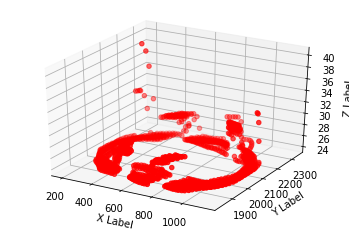

<Figure size 432x288 with 0 Axes>

In [3]:
matX = np.loadtxt('data/q3dm1-path1.csv', delimiter=',')
matX = matX.T
print(matX.shape)
plot_3d(matX)

(3, 1288)


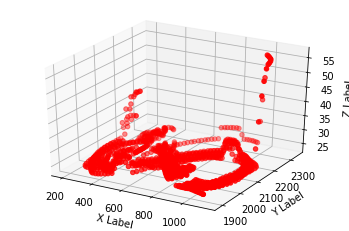

<Figure size 432x288 with 0 Axes>

In [4]:
matX2 = np.loadtxt('data/q3dm1-path2.csv', delimiter=',')
matX2 = matX2.T
print(matX2.shape)
plot_3d(matX2)

In [5]:
def initGridSOM(matX, kx, ky):
    G = nx.generators.lattice.grid_2d_graph(kx, ky)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, kx*ky, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:,smpl[i]]
    return G

In [6]:
def initRingSOM(matX, k):
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:,smpl[i]]
    return G

In [7]:
def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1.):
    m, n = matX.shape
    # compute matrix of squared path length distances between neurons
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    #       because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    # a list of tmax random indices into the columns of matrix X
    smpl = rnd.randint(0, n, size=tmax)
    for t in range(tmax):
        # sample a point x, i.e. a column of matrix X
        vecX = matX[:,smpl[t]]
        # determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]['w'] - vecX)**2) for v in G])
        # update the learning rate
        eta = eta0*(1. - t/tmax)
        # update the topological adaption rate
        sigma = sigma0*np.exp(-t/tmax)
        # update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5*matD[b,i] / sigma**2)
            G.nodes[v]['w'] += eta*h*(vecX - G.nodes[v]['w'])
    return G

In [8]:
def trainSOMV2(matX, G, tmax=1000, sigma0=1., eta0=1.):
    '''
    a numpythonic version of online SOM training
    '''
    m, n = matX.shape
    matW = np.vstack([G.nodes[v]['w'] for v in G.nodes()]).T
    m, k = matW.shape
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    smpl = rnd.randint(0, n, size=tmax)
    for t in range(tmax):
        # NOTE: for all of the below to work, we must reshape the sampled column of X
        vecX = matX[:,smpl[t]].reshape(m,1)
        b = np.argmin(np.sum((matW - vecX)**2, axis=0))
        eta = eta0*(1. - t/tmax)
        sigma = sigma0*np.exp(-t/tmax)
        vecH = np.exp(-0.5*matD[b,:]/sigma**2)
        matW += eta*vecH*(vecX - matW)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = np.ravel(matW[:,i])
    return G

In [53]:
SOM1 = initGridSOM(matX, 10, 10)


In [55]:
SOM1 = trainSOM(matX, SOM1, tmax=10000)

In [60]:
print(SOM1.number_of_nodes())
print(SOM1.number_of_edges())

som_1_x = []
som_1_y = []
som_1_z = []
z_iter = 0
for edg in SOM1.edges:
    som_1_x.append(edg[0])
    som_1_y.append(edg[1])
    som_1_z.append(matX[2][z_iter])
    z_iter +=1
som_1 = [som_1_x, som_1_y, som_1_z]

100
180


In [50]:
#nx.write_gpickle(SOM1, 'som.gpickle')
#SOM2 = nx.read_gpickle('som.gpickle')

som_1 = [[],[],[]]

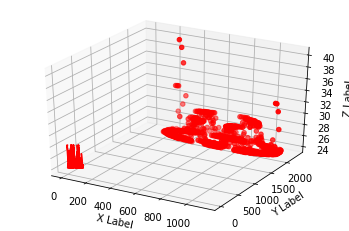

In [61]:

plot_3d_som(matX,som_1)

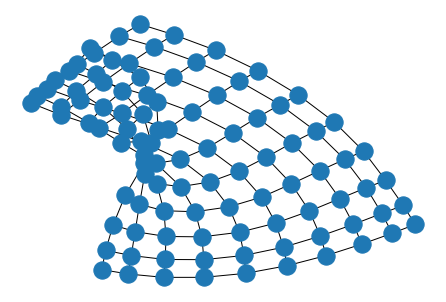

In [58]:
nx.draw(SOM1)

In [ ]:
SOM2 = initRingSOM(matX, 10)

In [ ]:
SOM2 = trainSOM(matX, SOM2, tmax=10000)

In [ ]:
plot_3d(SOM2)